In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import search 

In [5]:
G = nx.read_adjlist("./data/tiny_network.adjlist", delimiter=';', create_using=nx.DiGraph)

In [45]:
#print(G.nodes())
#should be 30
len(G.nodes())

30

In [46]:
#print(G.edges())
#should be 64
len(G.edges())

64

In [ ]:
nx.draw(G, with_labels=True)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [ ]:
#print(G.adj)

In [8]:
G.degree('31806696;Luke')

DiDegreeView({})

In [ ]:


#Returns whether or not the specified path exists.
#is_path(G, path)

is_path(G, )



In [ ]:


    current_layer = list(sources)
    visited = set(sources)


    # this is basically BFS, except that the current layer only stores the nodes at
    # same distance from sources at each iteration
    while current_layer:
        yield current_layer
        next_layer = list()
        for node in current_layer:
            for child in G[node]:
                if child not in visited:
                    visited.add(child)
                    next_layer.append(child)
        current_layer = next_layer

In [9]:
def bfs_traverse(G, start):
        queue=[]
        visited=[]

        queue.append(start)
        visited.append(start)

        #loop through while queue is not empty 
        while queue:
            v=queue.pop()
            N=G.neighbors(v)

            for w in N:
                if w not in visited:
                    visited.append(w)
                    queue.append(w)

        return(visited)

In [10]:
def shortest_path(pred, start, end):
    list1=[end]
    
    new_end=end
    
    

    while new_end != start:
        list1.append(pred[new_end])
        new_end=pred[new_end]
        
    
    return(list1[::-1])
    
    
    
    
    
    

In [43]:
def bfs_shortest(G, start, end):
        queue=[]
        visited=[]
        traversed=[]
        
        #make dictionary of predecessors
        pred={}
        

        queue.append(start)
        visited.append(start)
        pred[start]=None

        #loop through while queue is not empty 
        while queue:
            #print('current queue: ' + str(queue))
            #pop first element of queue!!!!
            v=queue.pop(0)
            #print(v)
            N=G.neighbors(v)
            traversed.append(v)
            
            #print(dict(enumerate(N)))
            
            for w in N:
                if w not in visited:
                    #print('current w: ' + str(w))
                    pred[w] = v
                    visited.append(w)
                    queue.append(w)
                    #print('visted: ' + str(visited))

        print('visited' + str(visited))
        print('traversed:' + str(traversed))
        return(shortest_path(pred, start, end))
    

In [44]:
bfs_shortest(G, 'Lani Wu', end='Martin Kampmann')

visited['Lani Wu', '32042149', '32036252', '31806696', '30727954', 'Hani Goodarzi', 'Steven Altschuler', 'Luke Gilbert', 'Michael McManus', '33232663', '33483487', '31626775', '31540829', '32025019', '29700475', 'Charles Chiu', 'Martin Kampmann', 'Neil Risch', 'Nevan Krogan', 'Atul Butte', 'Michael Keiser', '33242416', '32790644', '34272374', '32353859', '30944313', '33765435', '31395880', 'Marina Sirota', '31486345']
traversed:['Lani Wu', '32042149', '32036252', '31806696', '30727954', 'Hani Goodarzi', 'Steven Altschuler', 'Luke Gilbert', 'Michael McManus', '33232663', '33483487', '31626775', '31540829', '32025019', '29700475', 'Charles Chiu', 'Martin Kampmann', 'Neil Risch', 'Nevan Krogan', 'Atul Butte', 'Michael Keiser', '33242416', '32790644', '34272374', '32353859', '30944313', '33765435', '31395880', 'Marina Sirota', '31486345']


['Lani Wu', '32042149', 'Hani Goodarzi', '33232663', 'Martin Kampmann']

In [13]:
nx.shortest_path(G, 'Lani Wu', 'Martin Kampmann')

['Lani Wu', '32042149', 'Hani Goodarzi', '33232663', 'Martin Kampmann']

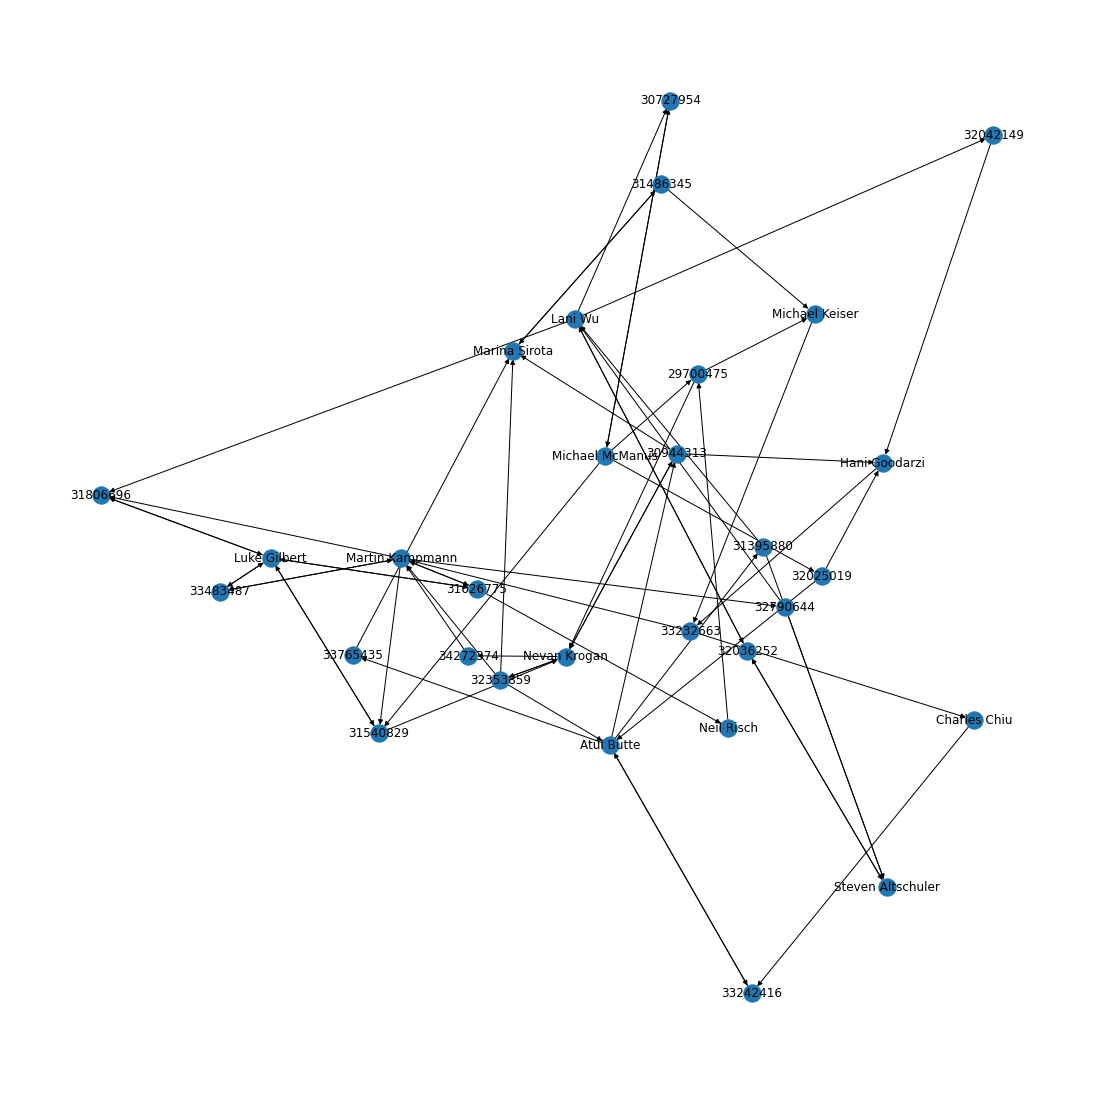

In [40]:
nx.draw(G, with_labels=True)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [ ]:
bfs_traverse(G, 'Charles Chiu')

In [ ]:
nx.bfs_layers(G, sources)

In [ ]:
from networkx import bfs_successors, bfs_layers

In [ ]:
def bfs_layers(G, sources):
    """Returns an iterator of all the layers in breadth-first search traversal.

    Parameters
    ----------
    G : NetworkX graph
        A graph over which to find the layers using breadth-first search.

    sources : node in `G` or list of nodes in `G`
        Specify starting nodes for single source or multiple sources breadth-first search

    Yields
    ------
    layer: list of nodes
        Yields list of nodes at the same distance from sources

    Examples
    --------
    >>> G = nx.path_graph(5)
    >>> dict(enumerate(nx.bfs_layers(G, [0, 4])))
    {0: [0, 4], 1: [1, 3], 2: [2]}
    >>> H = nx.Graph()
    >>> H.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)])
    >>> dict(enumerate(nx.bfs_layers(H, [1])))
    {0: [1], 1: [0, 3, 4], 2: [2], 3: [5, 6]}
    >>> dict(enumerate(nx.bfs_layers(H, [1, 6])))
    {0: [1, 6], 1: [0, 3, 4, 2], 2: [5]}
    """
    if sources in G:
        sources = [sources]

    current_layer = list(sources)
    visited = set(sources)

    for source in current_layer:
        if source not in G:
            raise nx.NetworkXError(f"The node {source} is not in the graph.")

    # this is basically BFS, except that the current layer only stores the nodes at
    # same distance from sources at each iteration
    while current_layer:
        yield current_layer
        next_layer = list()
        for node in current_layer:
            for child in G[node]:
                if child not in visited:
                    visited.add(child)
                    next_layer.append(child)
        current_layer = next_layer

In [ ]:
dict(enumerate(bfs_successors(G, source='Charles Chiu')))

In [ ]:
dict(enumerate(bfs_layers(G, 'Charles Chiu')))

In [ ]:
def bfs_shortest_path(G, start, end):
    discovered=[]
    frontier=[]
    dv=0
    pv=0
    prev_v=''